In [1]:
import import_ipynb
import Covid_analysis

Assignment Details:

Use the existing COVID-19 dataset (country_wise_latest.csv) and focus on the

following two numerical features:

 Confirmed Cases

 New Cases

You are required to perform the following tasks step-by-step:

1. Create a class CovidEDA to perform the below operations.

o Load the dataset using Pandas.

o Keep only the columns Confirmed and New cases for analysis.

2. Compute Statistical Measures o Calculate and print:

 Mean

 Median

 Variance

 Standard Deviation

 Correlation Matrix (between Confirmed and New cases)

3. Outlier Detection using IQR Technique

o Identify outliers in both Confirmed and New cases.

o Remove the outliers and store the cleaned data in a new DataFrame. 

o Display the cleaned dataset.

4. Normalization using Standard Scaler
o Apply StandardScaler from sklearn.preprocessing to normalize the
Confirmed and New Cases.

o Display the scaled (normalized) output as a new DataFrame.

5. Visualization Tasks

o Plot Histograms for Confirmed and New cases (before and after
normalization) using Seaborn, to visualize the bell curve.

 o Plot a Heatmap between Confirmed and New cases to display their correlation visually.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('country_wise_latest.csv')
df = pd.DataFrame(data)
print(df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [5]:
columns_to_keep = ["Confirmed", "New cases"]
cleaned_df = df[columns_to_keep]
cleaned_df.describe()

,Confirmed,New cases
count,1.870000e+02,187.000000
mean,8.813094e+04,1222.957219
std,3.833187e+05,5710.374790
min,1.000000e+01,0.000000
25%,1.114000e+03,4.000000
50%,5.059000e+03,49.000000
75%,4.046050e+04,419.500000
max,4.290259e+06,56336.000000


 Mean

 Median

 Variance

 Standard Deviation

 Correlation Matrix (between Confirmed and New cases)

In [6]:
print(f"Mean:\n{cleaned_df.mean()}\n")
print(f"Median:\n{cleaned_df.median()}\n")
print(f"Variance:\n{cleaned_df.var()}\n")
print(f"Standard Deviation:\n{cleaned_df.std()}\n")
print(f"Correlation Matrix:\n{cleaned_df.corr()}\n")

Mean:
Confirmed    88130.935829
New cases     1222.957219
dtype: float64

Median:
Confirmed    5059.0
New cases      49.0
dtype: float64

Variance:
Confirmed    1.469332e+11
New cases    3.260838e+07
dtype: float64

Standard Deviation:
Confirmed    383318.663831
New cases      5710.374790
dtype: float64

Correlation Matrix:
           Confirmed  New cases
Confirmed    1.00000    0.90972
New cases    0.90972    1.00000



Outlier detection and removal

In [11]:
Q1 = cleaned_df.quantile(0.25)
Q3 = cleaned_df.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1:\n{Q1}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound:\n{lower_bound}\n")
print(f"Upper Bound:\n{upper_bound}\n")

mask = ~((cleaned_df < lower_bound) | (cleaned_df > upper_bound))
outliers = cleaned_df[~mask]
outlier_removed_df = cleaned_df[mask]


Q1:
Confirmed    1114.0
New cases       4.0
Name: 0.25, dtype: float64

Q3:
Confirmed    40460.5
New cases      419.5
Name: 0.75, dtype: float64

IQR:
Confirmed    39346.5
New cases      415.5
dtype: float64

Lower Bound:
Confirmed   -57905.75
New cases     -619.25
dtype: float64

Upper Bound:
Confirmed    99480.25
New cases     1042.75
dtype: float64



In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(outlier_removed_df)

scaled_df = pd.DataFrame(
                scaled_array,
                columns=["Confirmed_scaled", "New_cases_scaled"]
            )

print(scaled_df.describe())

       Confirmed_scaled  New_cases_scaled
count      1.630000e+02      1.620000e+02
mean      -2.724474e-18      6.442035e-17
std        1.003082e+00      1.003101e+00
min       -6.604657e-01     -6.719685e-01
25%       -6.228884e-01     -6.626647e-01
50%       -5.167582e-01     -5.486934e-01
75%        1.060543e-01      2.211945e-01
max        3.382405e+00      3.603119e+00


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

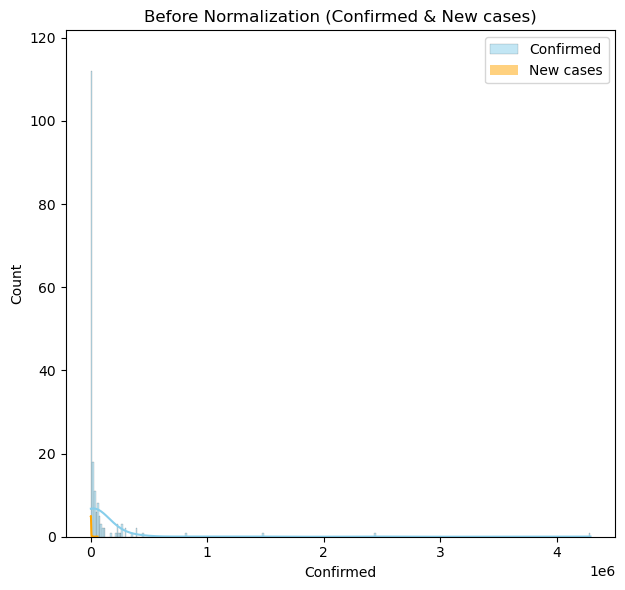

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(cleaned_df["Confirmed"], kde=True, color="skyblue", label="Confirmed")
sns.histplot(cleaned_df["New cases"], kde=True, color="orange", label="New cases")
plt.title("Before Normalization (Confirmed & New cases)")
plt.legend()


plt.tight_layout()
plt.show()

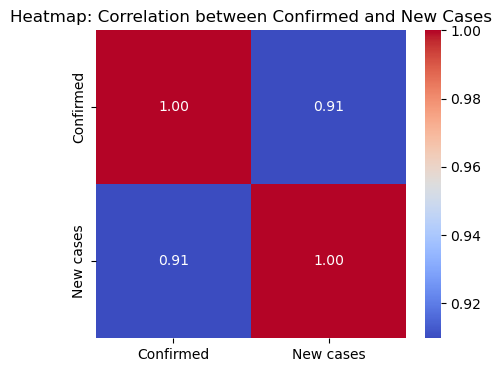

In [19]:
plt.figure(figsize=(5, 4))
sns.heatmap(cleaned_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Correlation between Confirmed and New Cases")
plt.show()